# Task 1: Acquire, preprocess, and analyze the data

In [1]:
!pip install pandas
import pandas as pd

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

import random
random.seed(1234)

##Function to normalized features

In [2]:
from sklearn.preprocessing import MinMaxScaler
def normalize_features(dataframe, target):

  X = dataframe.loc[:, dataframe.columns != target]
  y = dataframe.loc[:, target]

  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
  final_df = pd.concat([X_scaled,y],axis=1)
  return final_df


##NHANES_age_prediction.csv dataset

1. Load the NHANES_age_prediction.csv dataset :

In [3]:
# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X_a = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y_a = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

#concat X and y into one single pandas dataframe
df_a=pd.concat([X_a,y_a],axis=1)
df_a

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [4]:
df_a.isnull().sum()
#no missing data

RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64

2. Clean the data of NHANES_age_prediction.csv dataset :

In [5]:
#modified dataframe without NA
df_a_mod=df_a.dropna()
df_a_mod=normalize_features(df_a.dropna(),"age_group")
df_a_mod


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,1.0,0.166667,0.381295,0.137427,0.5,0.195035,0.144591,Adult
1,1.0,0.166667,0.104317,0.076023,0.5,0.070922,0.036319,Adult
2,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737,Adult
3,0.0,0.166667,0.258993,0.119883,0.5,0.078014,0.156730,Adult
4,1.0,0.000000,0.384892,0.116959,0.5,0.072695,0.105531,Adult
...,...,...,...,...,...,...,...,...
2273,1.0,0.166667,0.341727,0.108187,0.5,0.058511,0.062555,Adult
2274,0.0,0.166667,0.278777,0.087719,0.5,0.297872,0.126089,Adult
2275,0.0,0.166667,0.165468,0.116959,0.5,0.148936,0.208223,Adult
2276,1.0,0.166667,0.232014,0.078947,0.5,0.120567,0.047479,Adult


In [6]:
#unbalanced data
df_a_mod['age_group'].value_counts()

Adult     1914
Senior     364
Name: age_group, dtype: int64

In [7]:
#balance the data to make it more efficient for model evaluation
#df_a_mod = df_a_mod.groupby('age_group').head(364)
#df_a_mod = (df_a_mod.groupby('age_group', as_index=False)
#        .apply(lambda x: x.sample(n=364))
#       .reset_index(drop=True))


3. Compute basic statistics on the data of NHANES_age_prediction.csv dataset :
- Suppose that the positive group is age_group = Senior
- Suppose that the negative group is age_group = Adult

We will calculate the squared difference of the group means for each feature.

In [8]:
#statistics dataframe
df_a_stats=df_a_mod.groupby('age_group').mean()
df_a_stats.index=['Adult_means','Senior_means']
df_a_stats

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
Adult_means,0.512017,0.134361,0.242235,0.104224,0.507053,0.124097,0.117148
Senior_means,0.508242,0.151557,0.240760,0.120847,0.513736,0.179448,0.100492


In [9]:
#add difference of the group means for each feature
df_a_temp=df_a_stats.diff().dropna()
df_a_stats.diff()
df_a_temp.index=['Means_diff']
df_a_stats=pd.concat([df_a_stats,df_a_temp])

#add squared difference of the group means for each feature
df_a_temp=df_a_temp**2
df_a_temp.index=['Squared_diff_means']
df_a_stats=pd.concat([df_a_stats,df_a_temp])
df_a_stats

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
Adult_means,0.512017,0.134361,0.242235,0.104224,0.507053,0.124097,0.117148
Senior_means,0.508242,0.151557,0.240760,0.120847,0.513736,0.179448,0.100492
Means_diff,-0.003775,0.017196,-0.001475,0.016623,0.006683,0.055351,-0.016656
Squared_diff_means,0.000014,0.000296,0.000002,0.000276,0.000045,0.003064,0.000277


In [10]:
df_a_temp=pd.DataFrame(df_a_stats.loc['Squared_diff_means'])
df_a_rank=df_a_temp.sort_values(by='Squared_diff_means', ascending=False)
df_a_rank

,Squared_diff_means
LBXGLT,0.003064
PAQ605,0.000296
LBXIN,0.000277
LBXGLU,0.000276
DIQ010,0.000045
RIAGENDR,0.000014
BMXBMI,0.000002


LBXGLT, PAQ605, LBXIN ,and LBXGLU are the top features since they are ranked the highest. So they are the top features known to be associated with the target variable.

##Breast Cancer Wisconsin dataset

1.2 Load the Breast Cancer Wisconsin dataset :


In [11]:
# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X_b = breast_cancer_wisconsin_original.data.features
y_b = breast_cancer_wisconsin_original.data.targets

#concat X and y into one single pandas dataframe
df_b=pd.concat([X_b,y_b],axis=1)
df_b

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [12]:
df_b.isnull().sum()
#there's 16 missing values in Bare_nuclei

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

2.2 Clean the data of Breast Cancer Wisconsin dataset :

In [13]:
#modified dataframe without NA

df_b_mod=normalize_features(df_b,"Class")
df_b_mod=df_b_mod.dropna()
df_b_mod

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,2
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,2
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,4
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,4


In [14]:
#quite balanced data
df_b_mod['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [15]:
#balance the data to make it more efficient for model evaluation
#df_b_mod = df_b_mod.groupby('Class').head(239)
#df_b_mod = (df_b_mod.groupby('Class', as_index=False)
#        .apply(lambda x: x.sample(n=239))
#        .reset_index(drop=True))
#df_b_mod

3.2 Compute basic statistics on the data of Breast Cancer Wisconsin dataset :
- Suppose that the positive group is class = 4 (malignant)
- Suppose that the negative group is class = 2 (benign)

We will calculate the squared difference of the group means for each feature.

In [16]:
#statistics dataframe
df_b_stats=df_b_mod.groupby('Class').mean()
df_b_stats.index=['2_means','4_means']
df_b_stats

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
2_means,0.218218,0.034034,0.046046,0.038539,0.123123,0.038539,0.120370,0.029029,0.007257
4_means,0.687587,0.619712,0.617852,0.509530,0.480707,0.736402,0.552766,0.539749,0.178057


In [17]:
#add difference of the group means for each feature
df_b_temp=df_b_stats.diff().dropna()
df_b_stats.diff()
df_b_temp.index=['Means_diff']
df_b_stats=pd.concat([df_b_stats,df_b_temp])

#add squared difference of the group means for each feature
df_b_temp=df_b_temp**2
df_b_temp.index=['Squared_diff_means']
df_b_stats=pd.concat([df_b_stats,df_b_temp])
df_b_stats

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
2_means,0.218218,0.034034,0.046046,0.038539,0.123123,0.038539,0.120370,0.029029,0.007257
4_means,0.687587,0.619712,0.617852,0.509530,0.480707,0.736402,0.552766,0.539749,0.178057
Means_diff,0.469369,0.585678,0.571806,0.470992,0.357584,0.697863,0.432396,0.510720,0.170799
Squared_diff_means,0.220307,0.343018,0.326962,0.221833,0.127866,0.487013,0.186966,0.260835,0.029172


In [18]:
df_b_temp=pd.DataFrame(df_b_stats.loc['Squared_diff_means'])
df_b_rank=df_b_temp.sort_values(by='Squared_diff_means', ascending=False)
df_b_rank

,Squared_diff_means
Bare_nuclei,0.487013
Uniformity_of_cell_size,0.343018
Uniformity_of_cell_shape,0.326962
Normal_nucleoli,0.260835
Marginal_adhesion,0.221833
Clump_thickness,0.220307
Bland_chromatin,0.186966
Single_epithelial_cell_size,0.127866
Mitoses,0.029172


Bare_nuclei, Uniformity_of_cell_size, Uniformity_of_cell_shape are the top features since they are ranked the highest. So they are the top features known to be associated with the target variable.




# Task 2: Implement KNN and DT

##KNN class

In [19]:
import numpy as np

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski = lambda x1,x2,p : np.sum((x1 - x2)**p, axis=-1)**(1/p)

class KNN:

  def __init__(self, K=1, dist_fn= euclidean):
    self.dist_fn = dist_fn
    self.K = K
    return

  def fit(self, x, y):
    ''' Store the training data using this method as it is a lazy learner'''
    self.x = x
    self.y = y
    self.C = np.max(y) + 1
    return self

  def predict(self, x_test):
    ''' Makes a prediction using the stored training data and the test data given as argument'''
    num_test = x_test.shape[0]
    # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
    # self.x is in shape (100, 2), x_test is in shape (50, 2)
    # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
    # result: (x_test.shape[0], self.x.shape[0])
    distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:]) # N_train X N_test
    #ith-row of knns stores the indices of k closest training samples to the ith-test sample
    knns = np.zeros((num_test, self.K), dtype=int)
    #ith-row of y_prob has the probability distribution over C classes
    y_prob = np.zeros((num_test, self.C))
    for i in range(num_test):
        # print(i)
        knns[i,:] = np.argsort(distances[i])[:self.K]
        # print(knns[i,:])
        y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
    #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
    #simply divide by K to get a probability distribution
    y_prob /= self.K
    return y_prob, knns
  #accuracy function


def evaluate_acc(y_prob,y_test):
  '''Predict accuracy of the model on the test set'''
  y_pred = np.argmax(y_prob, axis=-1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  print(f'accuracy is {accuracy*100:.1f}.')





##DT class

In [20]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [21]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [22]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))

In [23]:
gini = cost_gini_index
misclassif = cost_misclassification
entropy = cost_entropy


class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        self.features_scores={}
    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value

        if split_feature not in self.features_scores:
          self.features_scores[split_feature]=1
        elif split_feature in self.features_scores:
          self.features_scores[split_feature]+=1
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right


    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
          self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs


# Task 3: Running experiements

- Test different K values by splitting the data into training, validation, and testing to select the best K.
- Check how maximum tree depth can affect the performance of DT
- Try out different distance functions for the model
- Compare the accuracy and AUROC of KNN and DT algorithm
- Plot the ROC for KNN and DT on the test data
- Features selection using correlation with the labels for KNN and rough feature importance score for DT

##Function to find the best K for KNN

In [24]:
import matplotlib.pyplot as plt
def findK(fn,x_test,y_test,x_train_tr,y_train_tr,x_train_va,y_train_va):
  '''Find the best K for KNN
  Plot a comparison graph for visualizing how the choice of K affects training data and test data accuracy'''
  model_choices=[]
  valid_acc = []
  test_acc = []
  train_acc = []

  n_valid = y_train_va.shape[0]
  n_test = y_test.shape[0]
  n_train = y_train_tr.shape[0]

  for k in range(1,21):
      knn = KNN(K=k,dist_fn=fn)
      y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
      y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
      accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
      model_choices.append(k)
      valid_acc.append(accuracy)

      y_train_test_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_test)
      y_train_test_pred = np.argmax(y_train_test_prob,axis=-1)
      accuracy = np.sum(y_train_test_pred == y_test)/n_test
      test_acc.append(accuracy)

      y_train_train_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
      y_train_train_pred = np.argmax(y_train_train_prob,axis=-1)
      accuracy = np.sum(y_train_train_pred == y_train_tr)/n_train
      train_acc.append(accuracy)

  # use the best K to predict test data
  best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
  knn = KNN(K=best_valid_K,dist_fn=fn)
  y_test_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_test)
  y_test_pred = np.argmax(y_test_prob, axis=-1)
  test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]

  y_train_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
  y_train_pred = np.argmax(y_train_prob, axis=-1)
  train_accuracy = np.sum(y_train_pred == y_train_tr)/y_train_tr.shape[0]

  y_valid_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
  y_valid_pred = np.argmax(y_valid_prob, axis=-1)
  valid_accuracy = np.sum(y_valid_pred == y_train_va)/y_train_va.shape[0]

  print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')
  print(f'training accuracy = {train_accuracy}')
  print(f'validation accuracy = {valid_accuracy}')


  plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
  plt.plot(model_choices, test_acc, marker='*', color='red', label='testing')
  plt.plot(model_choices, train_acc, marker='.', color='green', label='training')
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.savefig('iris_KNN_chooseK.png',dpi=300,bbox_inches='tight')


##Function to find the best tree depth

In [25]:
def findDepth(fn,x_test,y_test,x_train_tr,y_train_tr,x_train_va,y_train_va):
  '''Find the best tree depth for DT
  Plot a comparison graph for visualizing how the choice of tree depth affects training data and test data accuracy
  '''
  model_choices=[]
  train_acc = []
  valid_acc = []
  test_acc = []

  n_valid = y_train_va.shape[0]
  n_test = y_test.shape[0]
  n_train = y_train_tr.shape[0]

  for k in range(1, 21):
      dt = DecisionTree(max_depth=k,cost_fn=fn) # create a DT object (OOP)

      #training accuracy
      y_train_tr_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
      y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
      acc_tr = np.sum(y_train_tr_pred == y_train_tr)/n_train

      #validation accuracy
      y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_va)
      y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
      acc_va = np.sum(y_train_va_pred == y_train_va)/n_valid

      #test accuracy
      y_test_prob = dt.fit(x_train_tr, y_train_tr).predict(x_test)
      y_test_pred = np.argmax(y_test_prob, axis=-1)
      acc_test = np.sum(y_test_pred == y_test)/n_test

      model_choices.append(k)
      train_acc.append(acc_tr)
      valid_acc.append(acc_va)
      test_acc.append(acc_test)

  # use the best K to predict test data
  best_depth = model_choices[valid_acc.index(max(valid_acc))]
  dt = DecisionTree(max_depth=best_depth,cost_fn=fn)
  y_test_prob = dt.fit(x_train_tr, y_train_tr).predict(x_test)
  y_test_pred = np.argmax(y_test_prob, axis=-1)
  test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]

  y_train_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_tr)
  y_train_pred = np.argmax(y_train_prob, axis=-1)
  train_accuracy = np.sum(y_train_pred == y_train_tr)/y_train_tr.shape[0]

  y_train_va_prob = dt.fit(x_train_tr, y_train_tr).predict(x_train_va)
  y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
  valid_accuracy = np.sum(y_train_va_pred == y_train_va)/y_train_va.shape[0]

  print(f'best depth = {best_depth}, test accuracy = {test_accuracy}')
  print(f'training accuracy = {train_accuracy}')
  print(f'validation accuracy = {valid_accuracy}')

  plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
  plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
  plt.plot(model_choices, test_acc, marker='*', color='red', label='testing')
  plt.xlabel("Tree depth")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.savefig('iris_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

##Function to plot 2D scatterplot

In [26]:
def ScatterPlot(f1,f2,df,target,neg):
  x_a_scat=df[[f1,f2]].to_numpy()
  y_a_scat=np.where(df[target]==neg,0,1)
  #print the feature shape and classes of dataset
  (N,D), C = x_a_scat.shape, np.max(y_a_scat)+1
  print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

  inds = np.random.permutation(N)      #generates an indices array from 0 to N-1 and permutes it

  #split the dataset into train and test
  #randomly split the dataset into training data(33%), testing data(34%), validation data(33%)
  x_a_scat_train, x_a_scat_test, y_a_scat_train, y_a_scat_test = model_selection.train_test_split(x_a_scat,y_a_scat,test_size = 0.34, random_state=1, shuffle=True)
  x_a_scat_train_tr, x_a_scat_train_va, y_a_scat_train_tr, y_a_scat_train_va = model_selection.train_test_split(x_a_scat_train,y_a_scat_train,test_size = 0.5, random_state=1, shuffle=True)


  #visualization of the data
  plt.scatter(x_a_scat_train_tr[:,0], x_a_scat_train_tr[:,1], c=y_a_scat_train_tr, marker='o', label='train')
  plt.scatter(x_a_scat_test[:,0], x_a_scat_test[:,1], c=y_a_scat_test, marker='s', label='test')
  plt.legend()
  plt.ylabel(f1)
  plt.xlabel(f2)
  # plt.show()
  plt.savefig('iris.png', dpi=300)

##NHANES_age_prediction.csv dataset

Data splitting into training, validation, and test data:

In [27]:
from sklearn import model_selection
#x_a=df_a_mod[['LBXGLT','LBXGLU','LBXIN']].to_numpy()
x_a=df_a_mod[df_a_mod.columns[:-1]].to_numpy()
y_a=np.where(df_a_mod['age_group']=="Adult",0,1)

#randomly split the dataset into training data(33%), testing data(34%), validation data(33%)
x_a_train, x_a_test, y_a_train, y_a_test = model_selection.train_test_split(x_a,y_a,test_size = 0.34, random_state=1, shuffle=True)
x_a_train_tr, x_a_train_va, y_a_train_tr, y_a_train_va = model_selection.train_test_split(x_a_train,y_a_train,test_size = 0.5, random_state=1, shuffle=True)

###KNN


Find the best K for KNN with different distance functions:

best K = 12, test accuracy = 0.8374193548387097
training accuracy = 0.844207723035952
validation accuracy = 0.8457446808510638


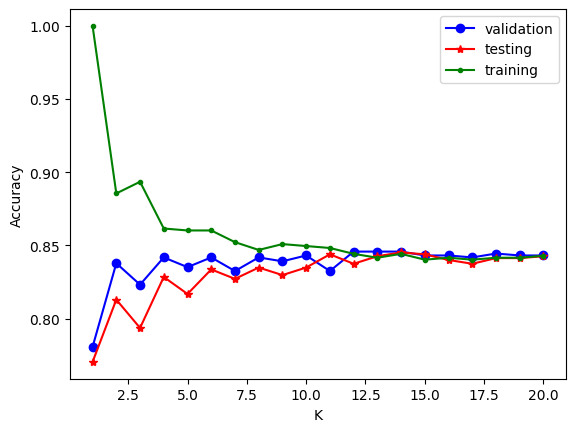

In [28]:
#euclidean
findK(euclidean,x_a_test,y_a_test,x_a_train_tr,y_a_train_tr,x_a_train_va,y_a_train_va)

best K = 8, test accuracy = 0.8438709677419355
training accuracy = 0.8535286284953395
validation accuracy = 0.8457446808510638


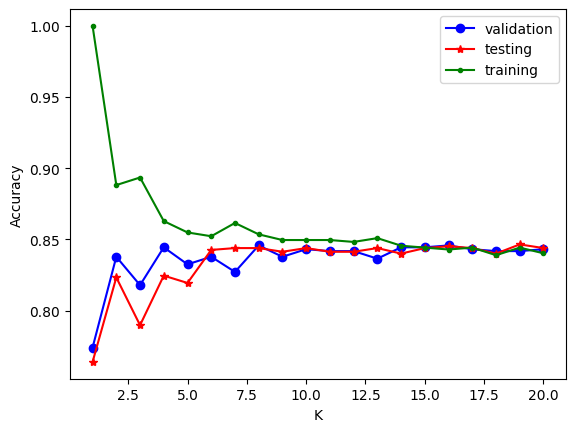

In [29]:
#manhattan
findK(manhattan,x_a_test,y_a_test,x_a_train_tr,y_a_train_tr,x_a_train_va,y_a_train_va)

KNN with Manhattan distance function has K = 8 with the best test accuracy of 84.39%. We observe also that training accuracy decreases as K increases, and validation and testing accuracy increases as K increases.

###DT

Find the best tree depth for DT model with different cost functions:

best depth = 1, test accuracy = 0.8387096774193549
training accuracy = 0.8348868175765646
validation accuracy = 0.8470744680851063


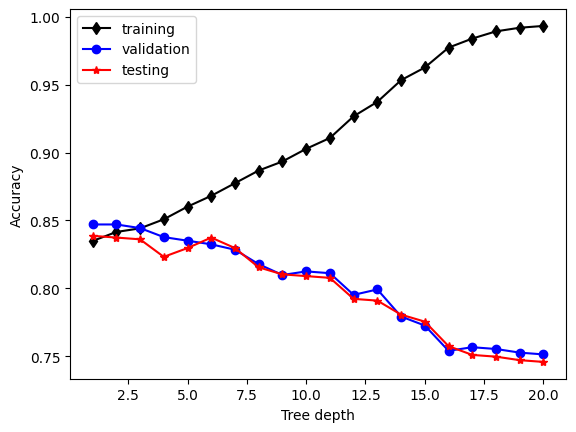

In [30]:
#misclassification cost function
findDepth(cost_misclassification,x_a_test,y_a_test,x_a_train_tr,y_a_train_tr,x_a_train_va,y_a_train_va)

best depth = 1, test accuracy = 0.8387096774193549
training accuracy = 0.8348868175765646
validation accuracy = 0.8470744680851063


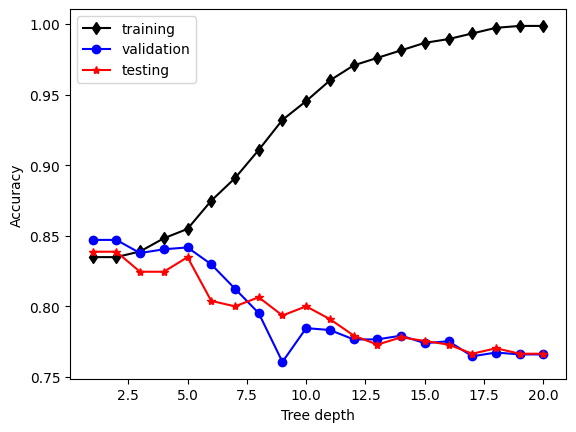

In [31]:
#entropy cost function
findDepth(cost_entropy,x_a_test,y_a_test,x_a_train_tr,y_a_train_tr,x_a_train_va,y_a_train_va)

best depth = 1, test accuracy = 0.8387096774193549
training accuracy = 0.8348868175765646
validation accuracy = 0.8470744680851063


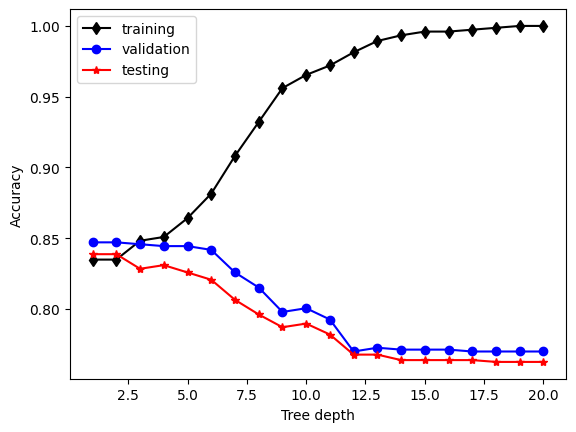

In [32]:
#gini index cost function
findDepth(cost_gini_index,x_a_test,y_a_test,x_a_train_tr,y_a_train_tr,x_a_train_va,y_a_train_va)

Best depth for all cost functions are 1 with same test accuracy of approximately 83.87%. We observe also that training accuracy increases as tree depth increases, and validation and testing accuracy decreases as tree depth increases.

###Model Comparison of KNN and DT

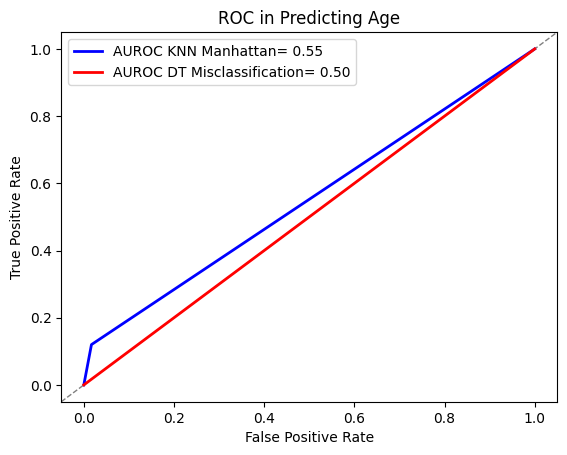

In [33]:
from sklearn import metrics


#KNN AUROC, ROC
best_a_knn=KNN(K=8,dist_fn=manhattan)
y_a_test_prob,_=best_a_knn.fit(x_a_train_tr, y_a_train_tr).predict(x_a_test)
y_a_test_pred = np.argmax(y_a_test_prob, axis=-1)
fpr, tpr, thresholds = metrics.roc_curve(y_a_test, y_a_test_pred)
roc_auc = metrics.roc_auc_score(y_a_test,y_a_test_pred)
plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC KNN Manhattan= %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in Predicting Age')
plt.legend(loc="best")

#DT AUROC, ROC
best_a_DT=DecisionTree(max_depth=1,cost_fn=cost_misclassification)
y_a_test_prob=best_a_DT.fit(x_a_train_tr, y_a_train_tr).predict(x_a_test)
y_a_test_pred = np.argmax(y_a_test_prob, axis=-1)
fpr, tpr, thresholds = metrics.roc_curve(y_a_test, y_a_test_pred)
roc_auc = metrics.roc_auc_score(y_a_test,y_a_test_pred)
plt.plot(fpr, tpr, "r-", lw=2, label="AUROC DT Misclassification= %0.2f"%roc_auc)
plt.legend(loc="best")

AUROC of KNN with Manhattan distance function is 0.55, which is better than AUROC of DT Misclassification cost funcion which is 0.50.

### Features Selection

Correlation matrix for KNN features selection:

In [34]:
#correlation matrix for KNN features selection

#print(df_a_mod.corr())

#correlation of age_group with each input features
a=pd.DataFrame(np.where(df_a_mod['age_group']=="Adult",0,1))
a_corr=pd.concat([df_a_mod[list(df_a_mod.columns)[:-1]],a],axis=1)
a_corr.columns = [*a_corr.columns[:-1], 'age_group']
a_corr.corr()


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
RIAGENDR,1.000000,0.151076,0.063873,-0.132342,-0.032769,0.017406,-0.016660,-0.002767
PAQ605,0.151076,1.000000,-0.042935,-0.007849,-0.002599,0.060413,0.010011,0.094789
BMXBMI,0.063873,-0.042935,1.000000,0.208330,0.047133,0.193375,0.552717,-0.004147
LBXGLU,-0.132342,-0.007849,0.208330,1.000000,-0.004427,0.685579,0.211911,0.116462
DIQ010,-0.032769,-0.002599,0.047133,-0.004427,1.000000,0.009796,0.058986,0.026399
LBXGLT,0.017406,0.060413,0.193375,0.685579,0.009796,1.000000,0.217272,0.243113
LBXIN,-0.016660,0.010011,0.552717,0.211911,0.058986,0.217272,1.000000,-0.064159
age_group,-0.002767,0.094789,-0.004147,0.116462,0.026399,0.243113,-0.064159,1.000000


In [35]:
#correlation of each feature with the target class age_group
a_corr=pd.DataFrame(a_corr.corr()['age_group'])
a_corr

#rank correlation by absolute value(correlation should be absolute in order to compare)
a_corr['rank'] = a_corr['age_group'].abs().rank(ascending=False)
a_corr.sort_values(by='rank')

,age_group,rank
age_group,1.000000,1.0
LBXGLT,0.243113,2.0
LBXGLU,0.116462,3.0
PAQ605,0.094789,4.0
LBXIN,-0.064159,5.0
DIQ010,0.026399,6.0
BMXBMI,-0.004147,7.0
RIAGENDR,-0.002767,8.0


LBXGLT, LBXGLU, PAQ605, LBXIN are the top most important features for KNN, ranked in the above.

Rough feature importance score for DT features selection:

In [36]:
a_select_dt=DecisionTree(max_depth=5,cost_fn=cost_gini_index)
a_select_dt.features_scores

a_select_dt.fit(x_a_train_tr, y_a_train_tr).predict(x_a_test)

new_a_select={}
for key, value in a_select_dt.features_scores.items():
    if key == 0:
        new_a_select['RIAGENDR'] = value
    elif key == 1:
        new_a_select['PAQ605'] = value
    elif key == 2:
        new_a_select['BMXBMI'] = value
    elif key == 3:
        new_a_select['LBXGLU'] = value
    elif key == 4:
        new_a_select['DIQ010'] = value
    elif key == 5:
        new_a_select['LBXGLT'] = value
    elif key == 6:
        new_a_select['LBXIN'] = value

dict(sorted(new_a_select.items(), key=lambda item: item[1],reverse=True))

{'BMXBMI': 9,
 'LBXIN': 6,
 'LBXGLU': 3,
 'LBXGLT': 2,
 'PAQ605': 2,
 'RIAGENDR': 2,
 'DIQ010': 1}

Above is the dictionary that sorts features in the order from most important to least important. We see that BMXBMI, LBXIN, LBXGLU, LBXGLT, and PAQ605 are the top most important features. These features are not classified exactly the same way as in task 1.

###2D Grid Data Visualization
- Many features are almost equally important, however we will choose LBXGLU and LBXGLT to be the two features for plotting the 2D scatterplot.

instances (N) 	 2278 
 features (D) 	 2 
 classes (C) 	 2


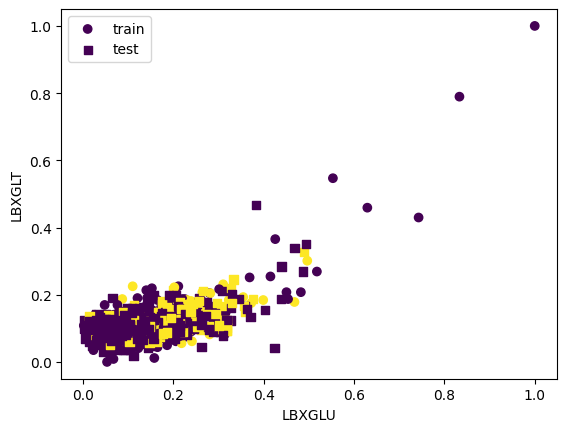

In [37]:
ScatterPlot("LBXGLT","LBXGLU",df_a_mod,"age_group","Adult")

##Breast Cancer Wisconsin dataset


Data splitting into validation, training, and test data:

In [38]:
#x_b=df_b_mod[df_b_mod[:-1]].to_numpy()

#x_b=df_b_mod[['Bare_nuclei','Uniformity_of_cell_shape','Uniformity_of_cell_size','Normal_nucleoli']].to_numpy()
x_b=df_b_mod[df_b_mod.columns[:-1]].to_numpy()
y_b=np.where(df_b_mod['Class']==2,0,1)

#randomly split the dataset into training data(33%), testing data(34%), validation data(33%)
x_b_train, x_b_test, y_b_train, y_b_test = model_selection.train_test_split(x_b,y_b,test_size = 0.34, random_state=1, shuffle=True)
x_b_train_tr, x_b_train_va, y_b_train_tr, y_b_train_va = model_selection.train_test_split(x_b_train,y_b_train,test_size = 0.5, random_state=1, shuffle=True)

###KNN

Find best K for KNN with different distance functions:

best K = 1, test accuracy = 0.9656652360515021
training accuracy = 1.0
validation accuracy = 0.9733333333333334


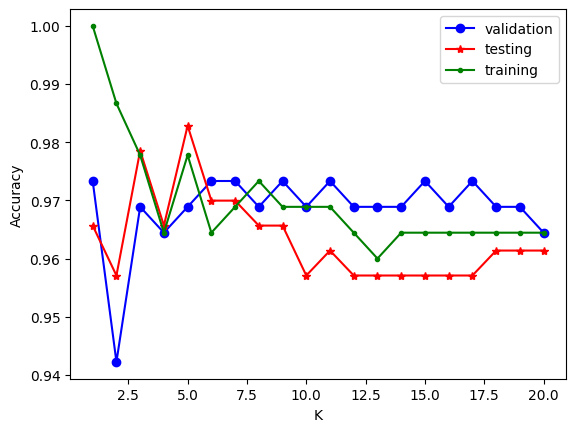

In [39]:
#euclidean
findK(euclidean,x_b_test,y_b_test,x_b_train_tr,y_b_train_tr,x_b_train_va,y_b_train_va)

best K = 1, test accuracy = 0.9656652360515021
training accuracy = 1.0
validation accuracy = 0.9777777777777777


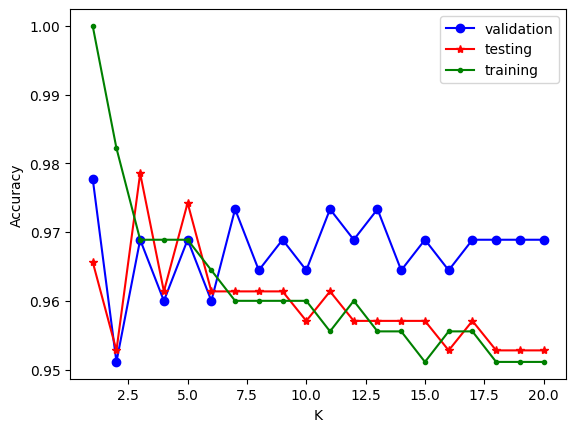

In [40]:
#manhattan
findK(manhattan,x_b_test,y_b_test,x_b_train_tr,y_b_train_tr,x_b_train_va,y_b_train_va)

Best K for all distance functions are 1 with same test accuracy of approximately 96.57%. We observe also that training and testing accuracy decreases as K increases, and validation accuracy varies stably as K increases.

###DT

Find the best tree depth with different cost functions:

best depth = 2, test accuracy = 0.9527896995708155
training accuracy = 0.9644444444444444
validation accuracy = 0.9555555555555556


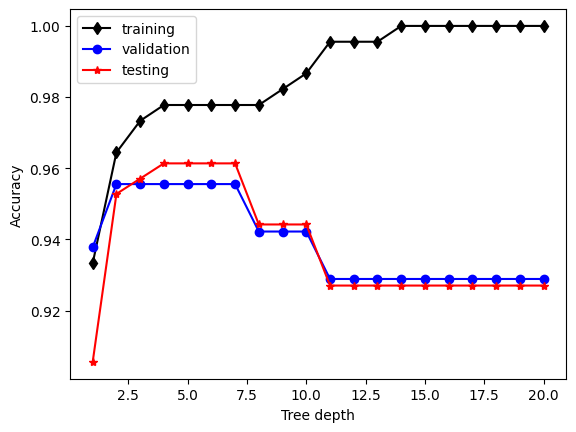

In [41]:
#misclassification cost function
findDepth(cost_misclassification,x_b_test,y_b_test,x_b_train_tr,y_b_train_tr,x_b_train_va,y_b_train_va)

For Misclassification cost function, best depth is 2 with test accuracy of approximately 95.28%. We observe also that training accuracy increases as tree depth increases, and validation and testing accuracy decreases as tree depth increases.

best depth = 4, test accuracy = 0.9656652360515021
training accuracy = 0.9822222222222222
validation accuracy = 0.96


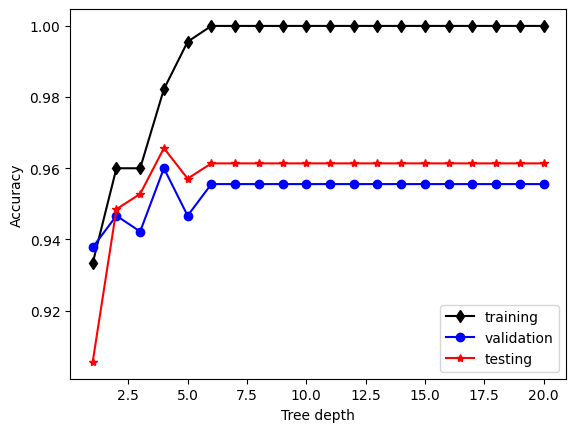

In [42]:
#entropy cost function
findDepth(cost_entropy,x_b_test,y_b_test,x_b_train_tr,y_b_train_tr,x_b_train_va,y_b_train_va)

For Entropy cost function, best depth = 4 with test accuracy of approximately 96.57%. We observe also that training, validation, and testing accuracy increase for a few tree depths then become stable as tree depth continue to increase.

best depth = 3, test accuracy = 0.9570815450643777
training accuracy = 0.9733333333333334
validation accuracy = 0.96


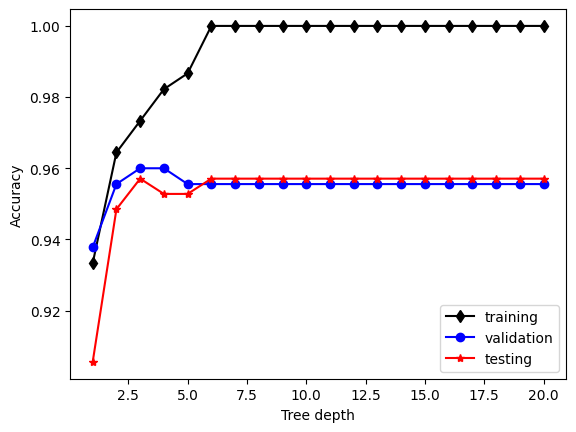

In [43]:
#gini index cost function
findDepth(cost_gini_index,x_b_test,y_b_test,x_b_train_tr,y_b_train_tr,x_b_train_va,y_b_train_va)

For Gini index cost function, best depth = 3 with test accuracy of approximately 95.71%. We observe also that training, validation, and testing accuracy increase for a few tree depths then become stable as tree depth continue to increase.

###Model Comparison of KNN and DT

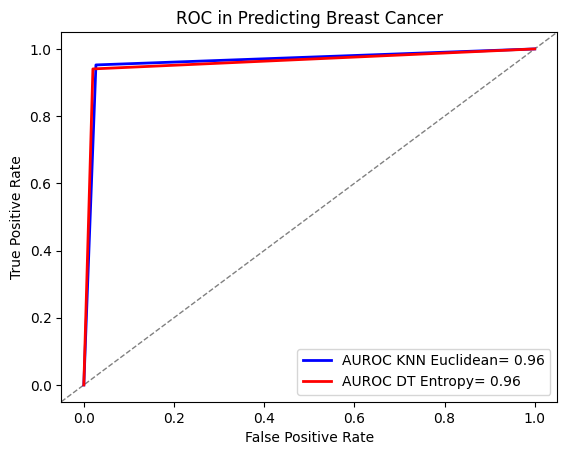

In [44]:
plt.clf()
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in Predicting Breast Cancer')
plt.legend(loc="best")

#KNN AUROC, ROC
best_b_knn=KNN(K=1,dist_fn=euclidean)
y_b_test_prob,_=best_b_knn.fit(x_b_train_tr, y_b_train_tr).predict(x_b_test)
y_b_test_pred = np.argmax(y_b_test_prob, axis=-1)
fpr, tpr, thresholds = metrics.roc_curve(y_b_test, y_b_test_pred)
roc_auc = metrics.roc_auc_score(y_b_test,y_b_test_pred)
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC KNN Euclidean= %0.2f"%roc_auc)
plt.legend(loc="best")

#DT AUROC,ROC
best_b_DT=DecisionTree(max_depth=4,cost_fn=cost_entropy)
y_b_test_prob=best_b_DT.fit(x_b_train_tr, y_b_train_tr).predict(x_b_test)
y_b_test_pred = np.argmax(y_b_test_prob, axis=-1)
fpr, tpr, thresholds = metrics.roc_curve(y_b_test, y_b_test_pred)
roc_auc = metrics.roc_auc_score(y_b_test,y_b_test_pred)
plt.plot(fpr, tpr, "r-", lw=2, label="AUROC DT Entropy= %0.2f"%roc_auc)
plt.legend(loc="best")


AUROC of KNN with Euclidean distance function and AUROC of DT with Entropy cost function are the same, which are all 0.96.

###Features Selection

Correlation matrix for KNN features selection:

In [45]:
#correlation matrix for KNN features selection
df_b_mod.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity_of_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity_of_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [46]:
#correlation of Class with each input features
b_corr=pd.DataFrame(df_b_mod.corr()['Class'])

#rank correlation
b_corr['rank'] = b_corr['Class'].rank(ascending=False)
b_corr.sort_values(by='rank')

,Class,rank
Class,1.000000,1.0
Bare_nuclei,0.822696,2.0
Uniformity_of_cell_shape,0.821891,3.0
Uniformity_of_cell_size,0.820801,4.0
Bland_chromatin,0.758228,5.0
Normal_nucleoli,0.718677,6.0
Clump_thickness,0.714790,7.0
Marginal_adhesion,0.706294,8.0
Single_epithelial_cell_size,0.690958,9.0
Mitoses,0.423448,10.0


The above dataframe ranks the features from the most important to the least important. We see that Bare_nuclei, Uniformity_of_cell_shape, Uniformity_of_cell_size, Bland_chromatin, and Normal_nucleoli are the top five most important features, ranked as in the above.

Use rough features importance scores for DT features selection:

In [47]:
b_select_dt=DecisionTree(max_depth=3,cost_fn=cost_misclassification)
b_select_dt.features_scores

b_select_dt.fit(x_b_train_tr, y_b_train_tr).predict(x_b_test)

new_b_select={}
for key, value in b_select_dt.features_scores.items():
    if key == 0:
        new_b_select['Clump_thickness'] = value
    elif key == 1:
        new_b_select['Uniformity_of_cell_size'] = value
    elif key == 2:
        new_b_select['Uniformity_of_cell_shape'] = value
    elif key == 3:
        new_b_select['Marginal_adhesion'] = value
    elif key == 4:
        new_b_select['Single_epithelial_cell_size'] = value
    elif key == 5:
        new_b_select['Bare_nuclei'] = value
    elif key == 6:
        new_b_select['Bland_chromatin'] = value
    elif key == 7:
        new_b_select['Normal_nucleoli'] = value
    elif key == 8:
        new_b_select['Mitoses'] = value

dict(sorted(new_b_select.items(), key=lambda item: item[1],reverse=True))

{'Clump_thickness': 2,
 'Uniformity_of_cell_shape': 1,
 'Bare_nuclei': 1,
 'Uniformity_of_cell_size': 1,
 'Single_epithelial_cell_size': 1}

As shown above, the features are sorted from most important to least important. We see that Clump_thickness, Uniformity_of_cell_shape, Bare_nuclei, Uniformity_of_cell_size, and Single_epithelial_cell_sizes are the top five most important features, which is not exactly the same as in task 1. The reason is that rough features importance scores use greedy approach to select the best feature without considering the whole data, whereas squared group means difference approach considers the whole data.

###2D Grid Data Visualization
Many features are almost equally important, however we will choose Uniformity_of_cell_shape and Bare_nuclei to be the two features for plotting the 2D scatterplot. Since these two features have positive correlation with the target variable, so the data closer to the origin belong to the negative group(=0) whereas data farther away from the origin belong to the positive group(=1).

instances (N) 	 683 
 features (D) 	 2 
 classes (C) 	 2


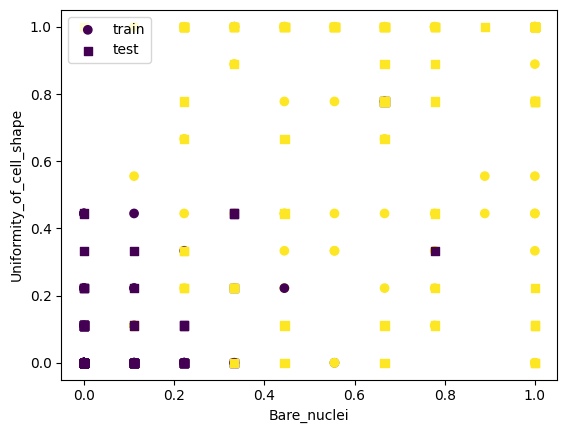

In [48]:
ScatterPlot("Uniformity_of_cell_shape","Bare_nuclei",df_b_mod,"Class",2)